# Install Dependencies

## External Dependencies

In [1]:
!pip install python-telegram-bot matplotlib seaborn prettytable pandas beautifulsoup4 yfinance expiringdict easy_equities_client


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


## FrostAura Dependencies

In [2]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura

Note: you may need to restart the kernel to use updated packages.


# Import Dependencies

In [3]:
from frostaura.managers import IAssetReportingManager
from frostaura.managers import PersonalAssetReportingManager
from frostaura.data_access import IResourcesDataAccess
from frostaura.data_access import EmbeddedResourcesDataAccess
from frostaura.data_access import IPersonalAssetDataAccess
from frostaura.data_access import EasyEquitiesPersonalAssetDataAccess
from frostaura.data_access import IPublicAssetDataAccess
from frostaura.data_access import YahooFinanceDataAccess
from frostaura.engines import IAssetCalculationsEngine
from frostaura.engines import SimpleAssetCalculationsEngine
from frostaura.data_access import HtmlResourcesDataAccess
from frostaura.engines import IAssetProjectionEngine
from frostaura.engines import SimpleAssetProjectionEngine
from frostaura.engines import IAssetValuationEngine
from frostaura.engines import FinvizAssetValuationEngine
from frostaura.engines import IVisualizationEngine
from frostaura.engines import FrostAuraVisualizationEngine
from frostaura.data_access import INotificationsDataAccess
from frostaura.data_access import TelegramNotificationsDataAccess

# Usage

In [4]:

config: dict = {}
resource_data_access: IResourcesDataAccess = EmbeddedResourcesDataAccess()
personal_asset_data_access: IPersonalAssetDataAccess = EasyEquitiesPersonalAssetDataAccess(resource_data_access=resource_data_access,
                                                                                           username=None,
                                                                                           password=None)
public_asset_data_access: IPublicAssetDataAccess = YahooFinanceDataAccess()
asset_calculation_engine: IAssetCalculationsEngine = SimpleAssetCalculationsEngine(public_asset_data_access=public_asset_data_access)
html_data_access: IResourcesDataAccess = HtmlResourcesDataAccess()
asset_valuation_engine: IAssetValuationEngine = FinvizAssetValuationEngine(html_data_access=html_data_access)
asset_projection_engine: IAssetProjectionEngine = SimpleAssetProjectionEngine(asset_valuation_engine=asset_valuation_engine,
                                                                              public_asset_data_access=public_asset_data_access)
visualization_engine: IVisualizationEngine = FrostAuraVisualizationEngine()
bot_token = '5535601062:AAGpXCCTWa8OBajV3AeTPrmIOIFjPi_H3p8'
dean_martin_personal_chat_id: str = '1551490751'
personal_notification_data_access: INotificationsDataAccess = TelegramNotificationsDataAccess(bot_token=bot_token,
                                                                                              chat_id=dean_martin_personal_chat_id)
public_asset_data_access: IPublicAssetDataAccess = YahooFinanceDataAccess()
instance: IAssetReportingManager = PersonalAssetReportingManager(personal_asset_data_access=personal_asset_data_access,
                                                                 asset_calculation_engine=asset_calculation_engine,
                                                                 asset_valuation_engine=asset_valuation_engine,
                                                                 asset_projection_engine=asset_projection_engine,
                                                                 visualization_engine=visualization_engine,
                                                                 personal_notification_data_access=personal_notification_data_access,
                                                                 public_asset_data_access=public_asset_data_access)

ERROR:telegram.ext.updater:Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
ERROR:telegram.ext.dispatcher:No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/tensorflow-apple-metal/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/dean

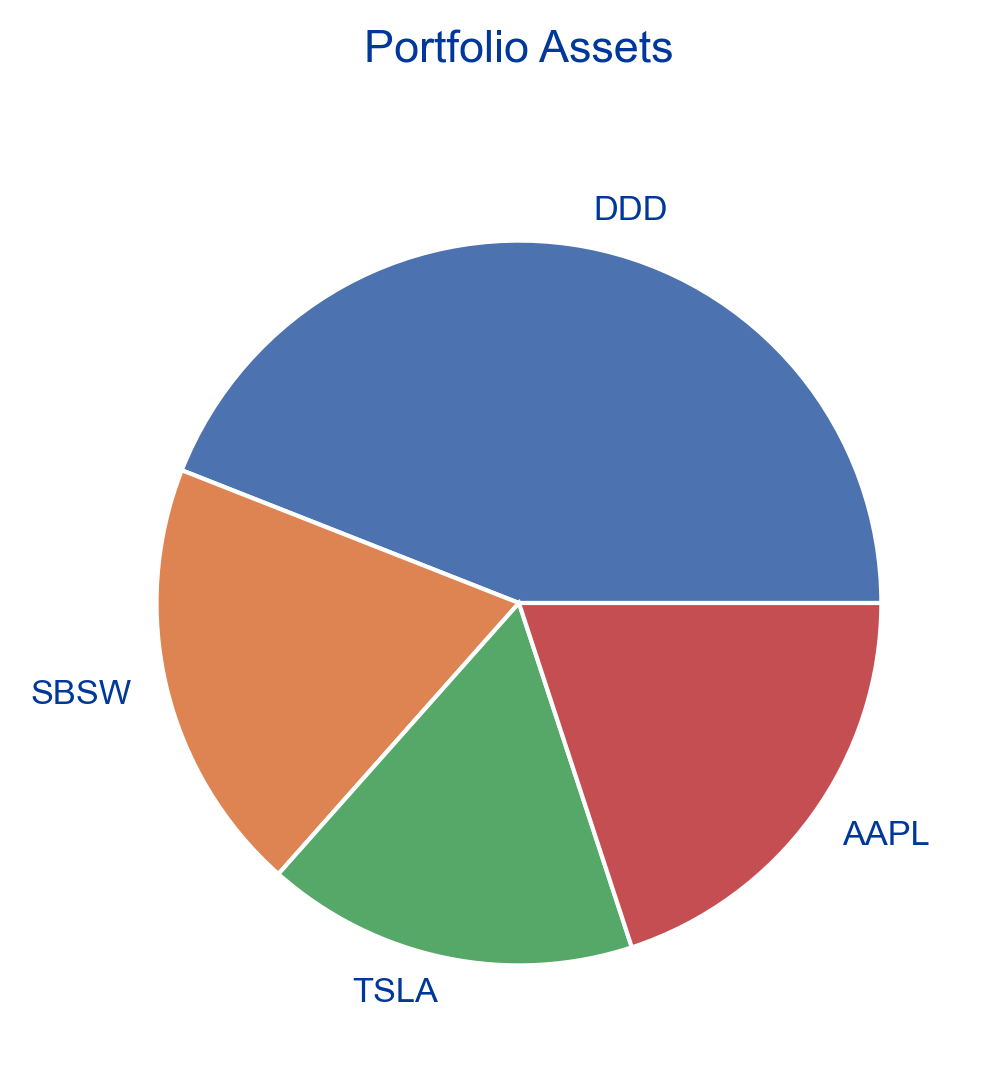

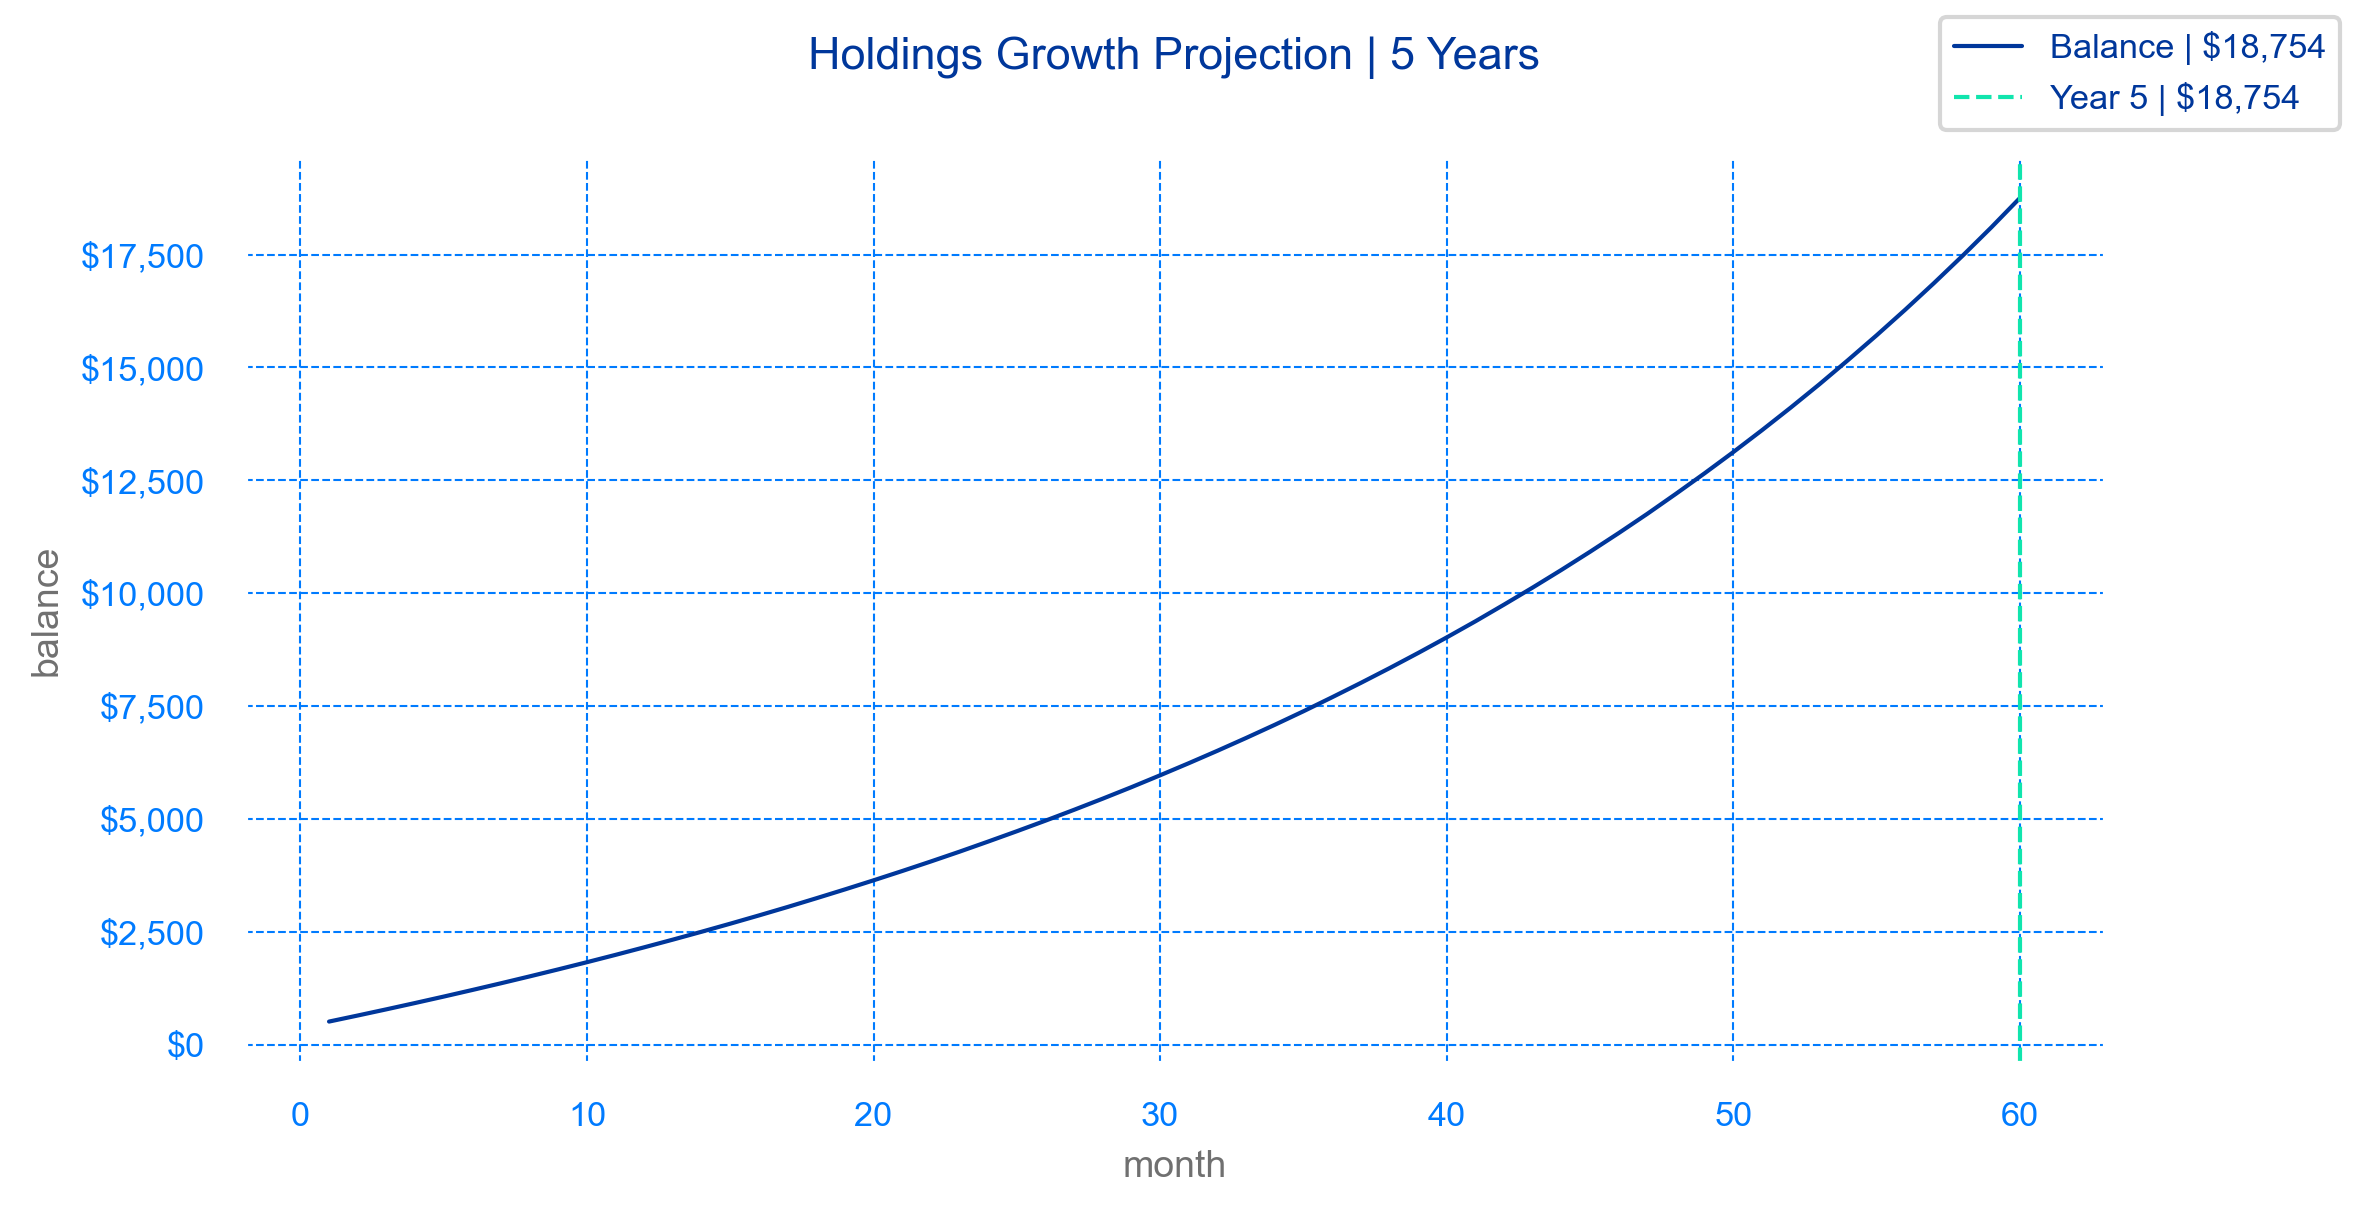

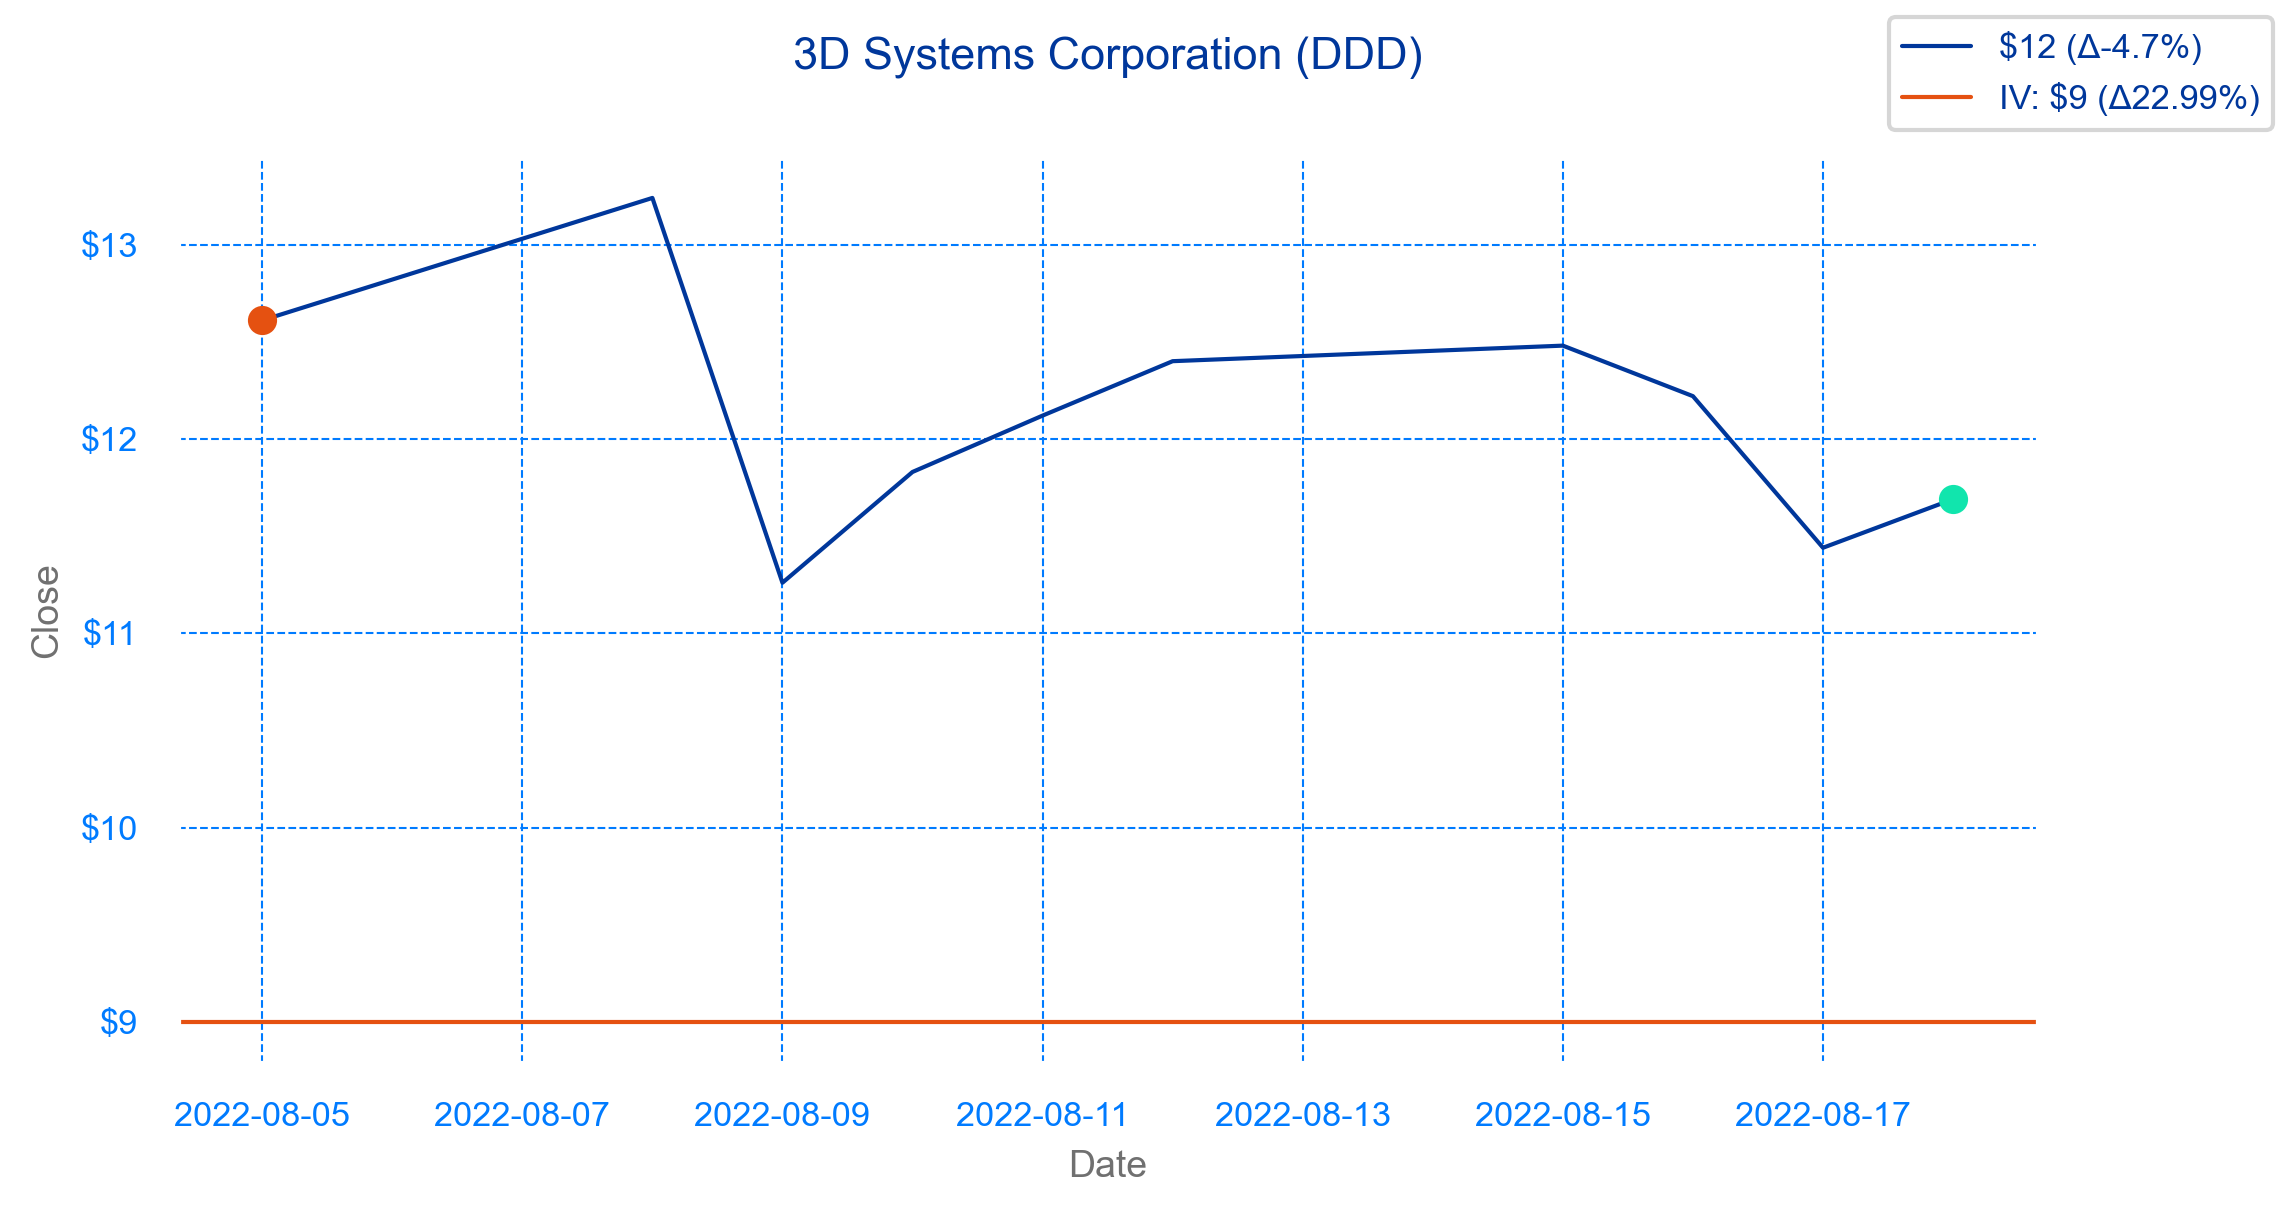

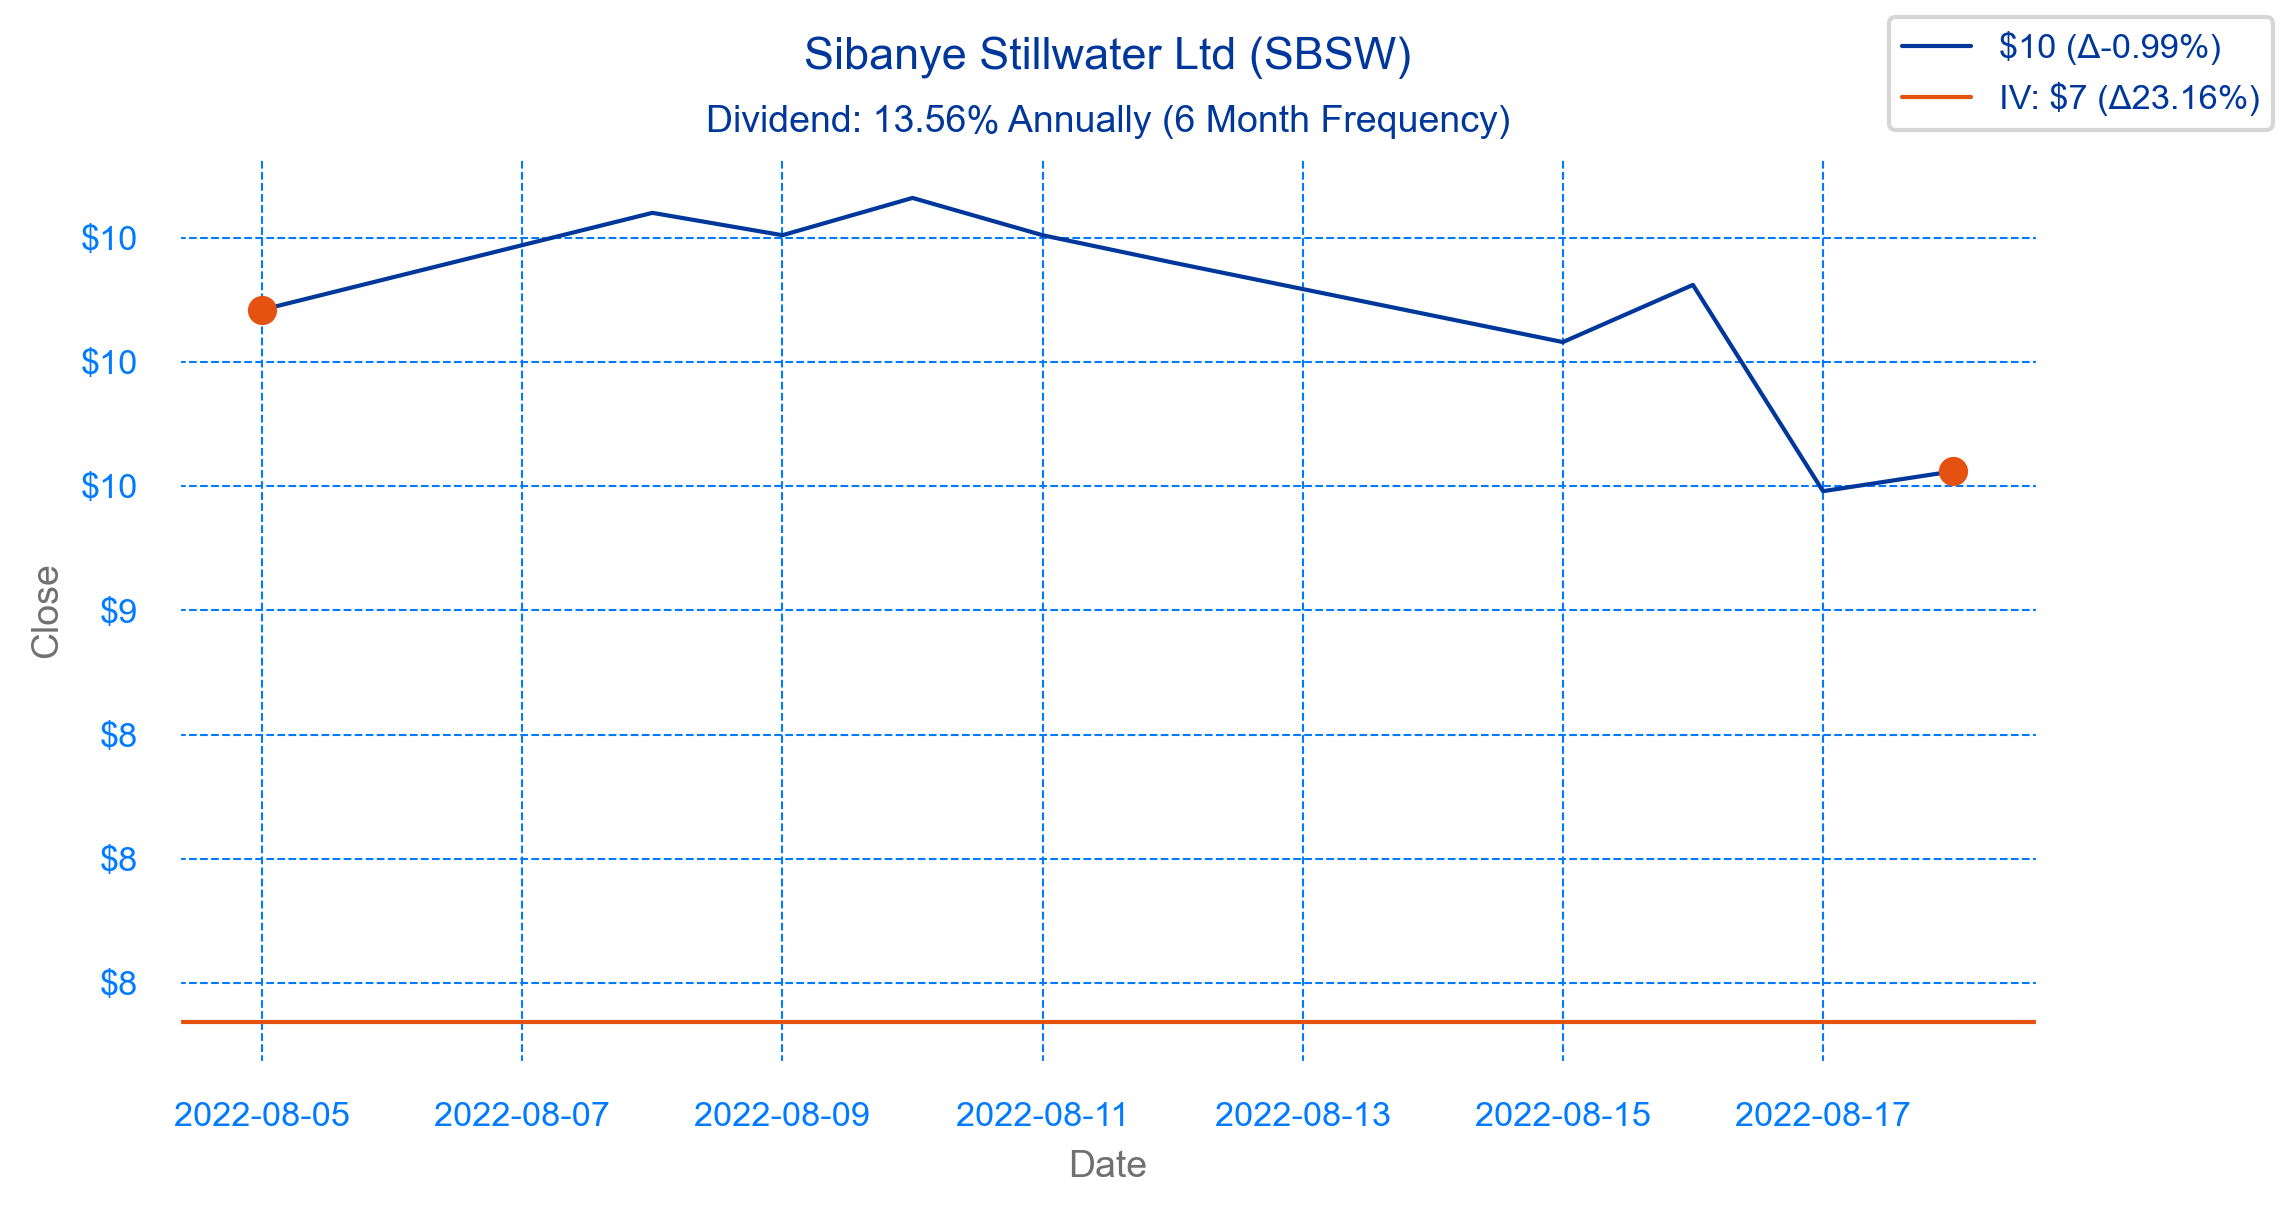

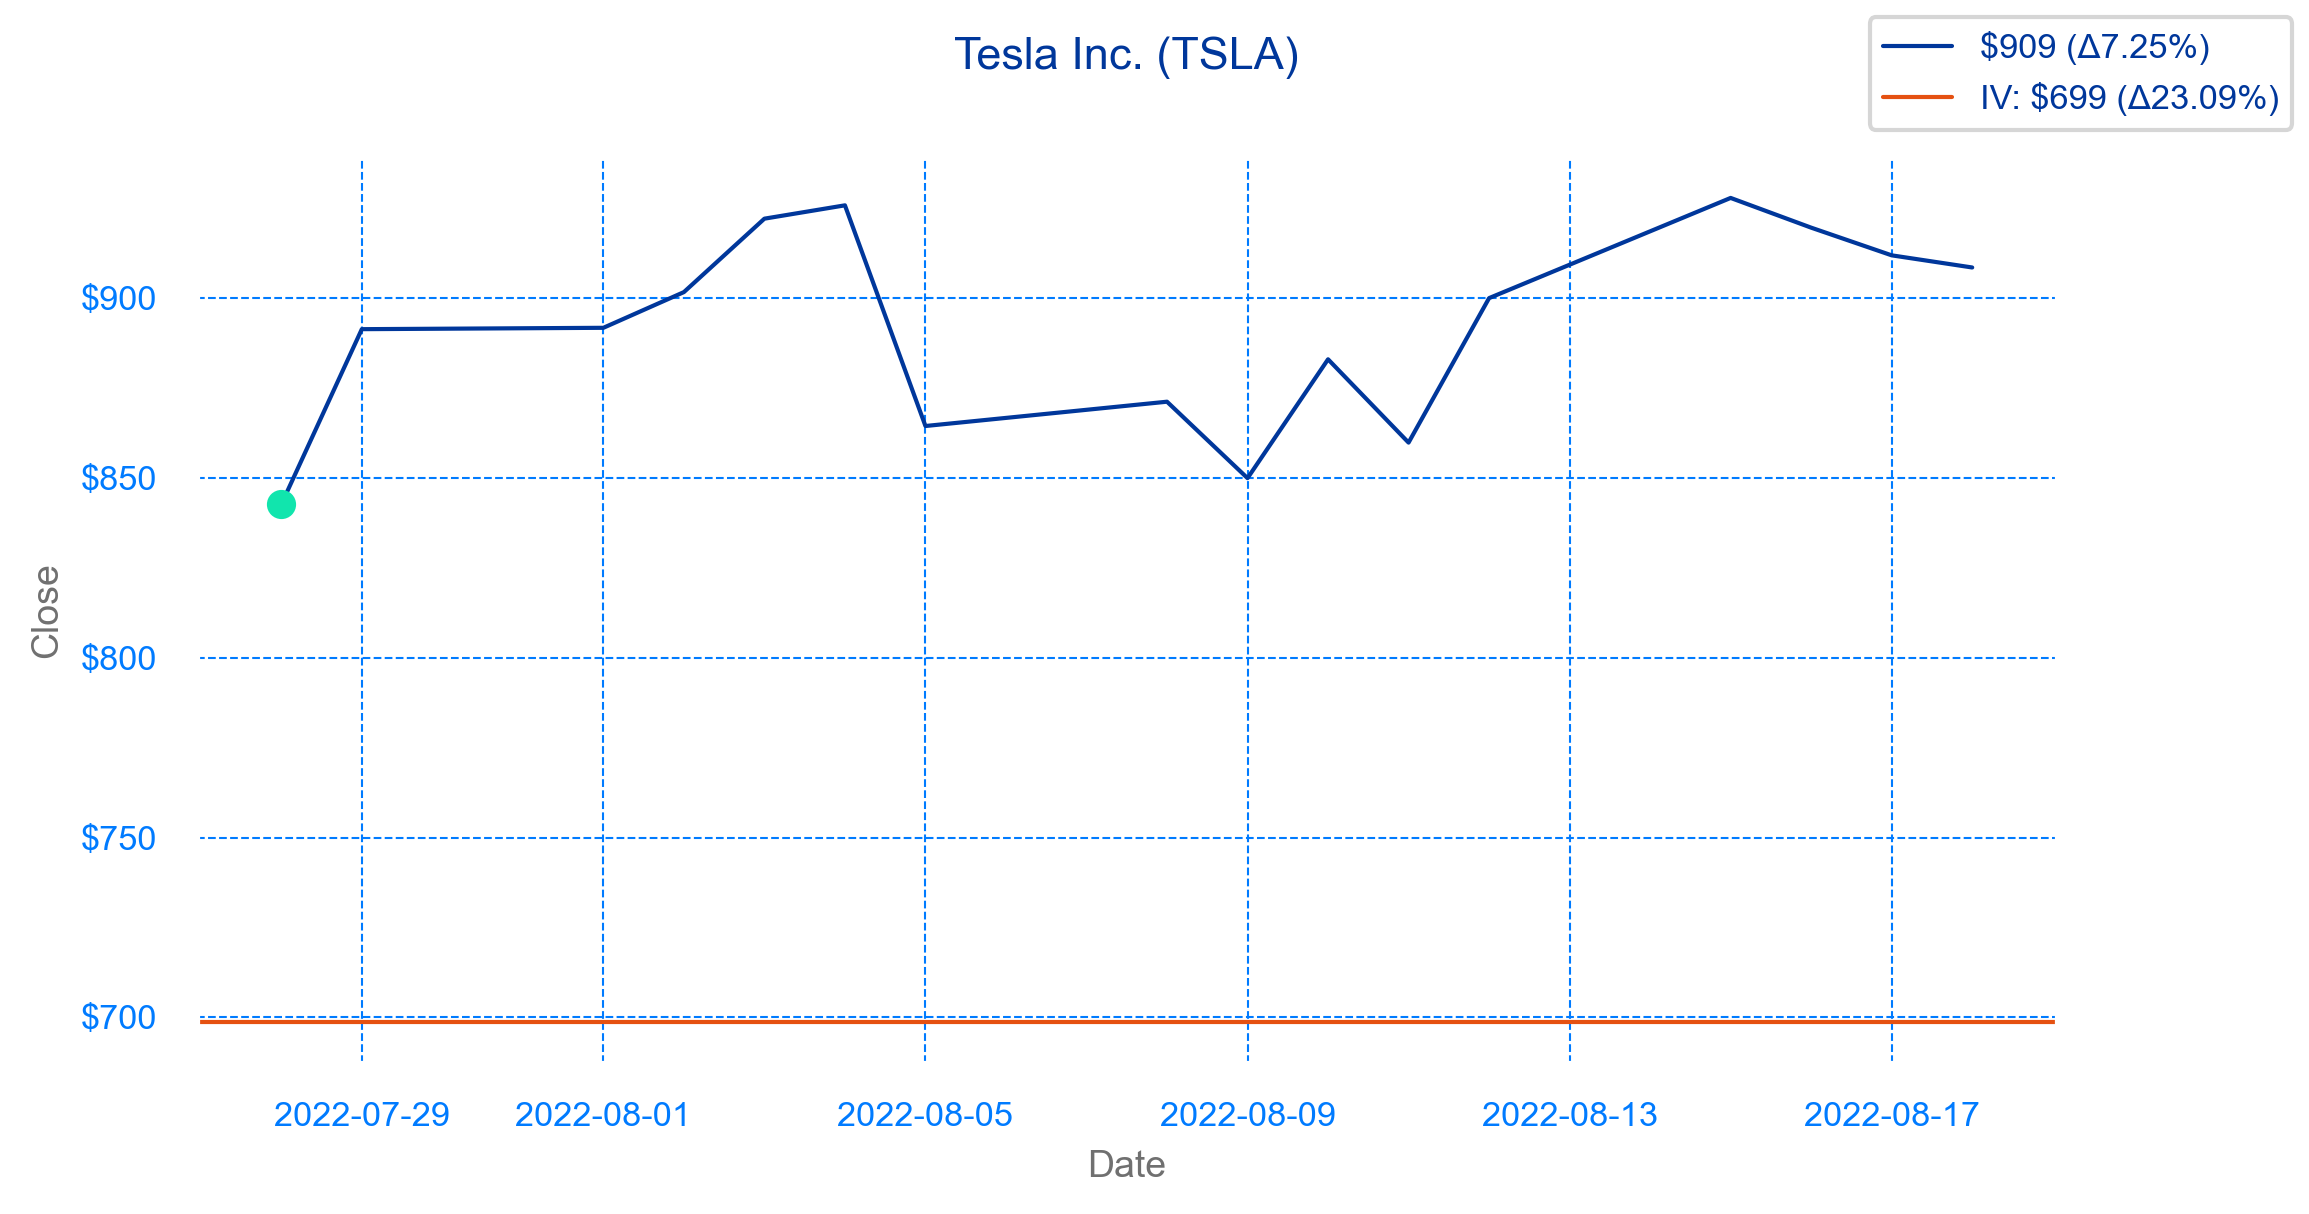

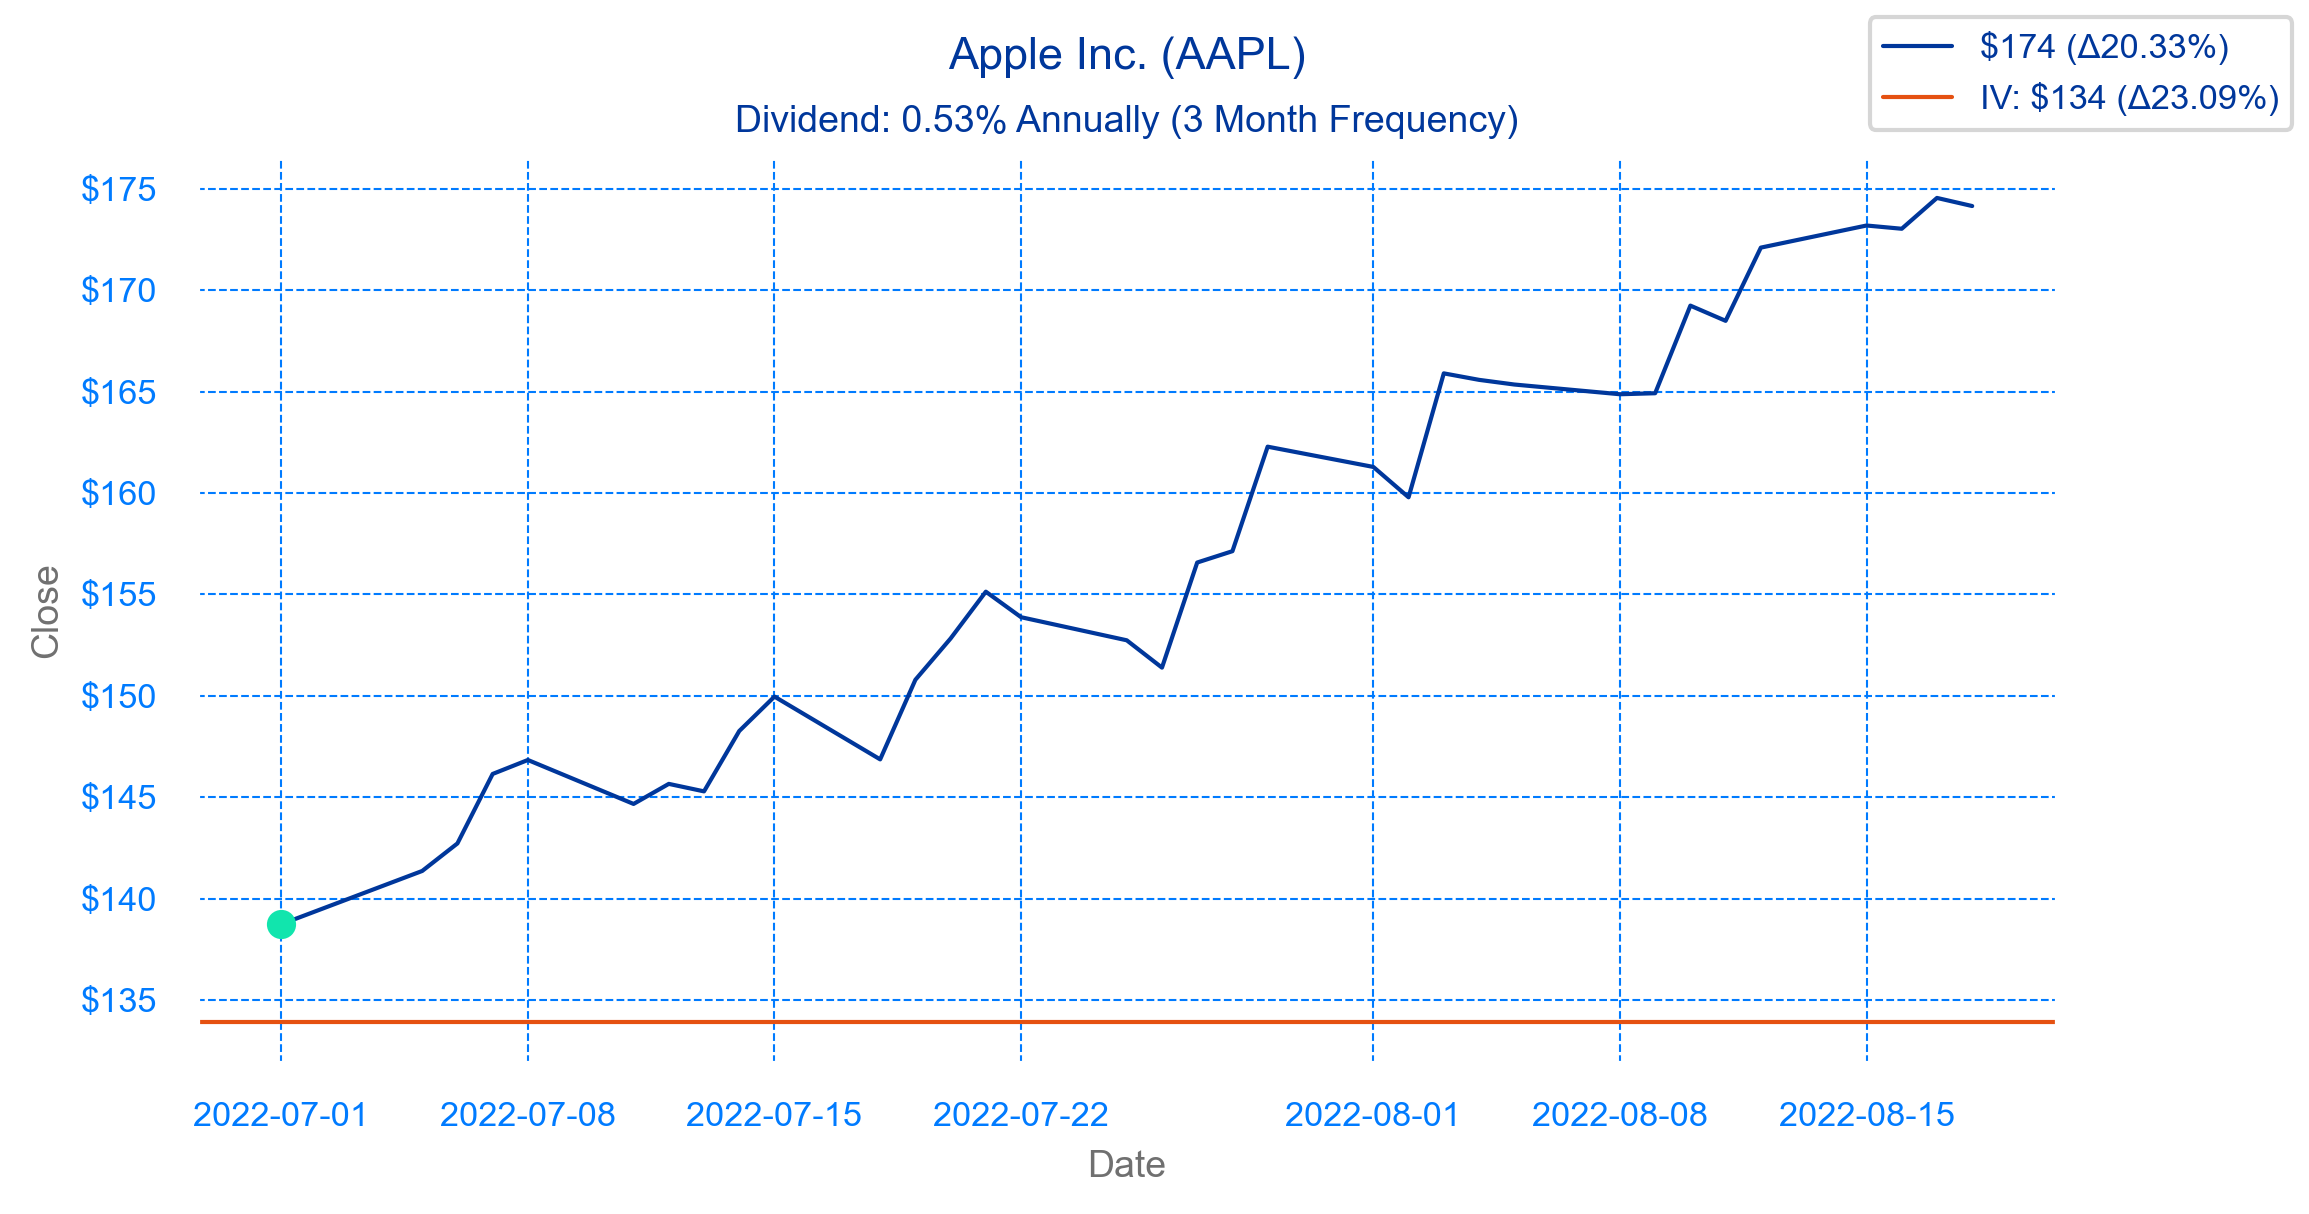

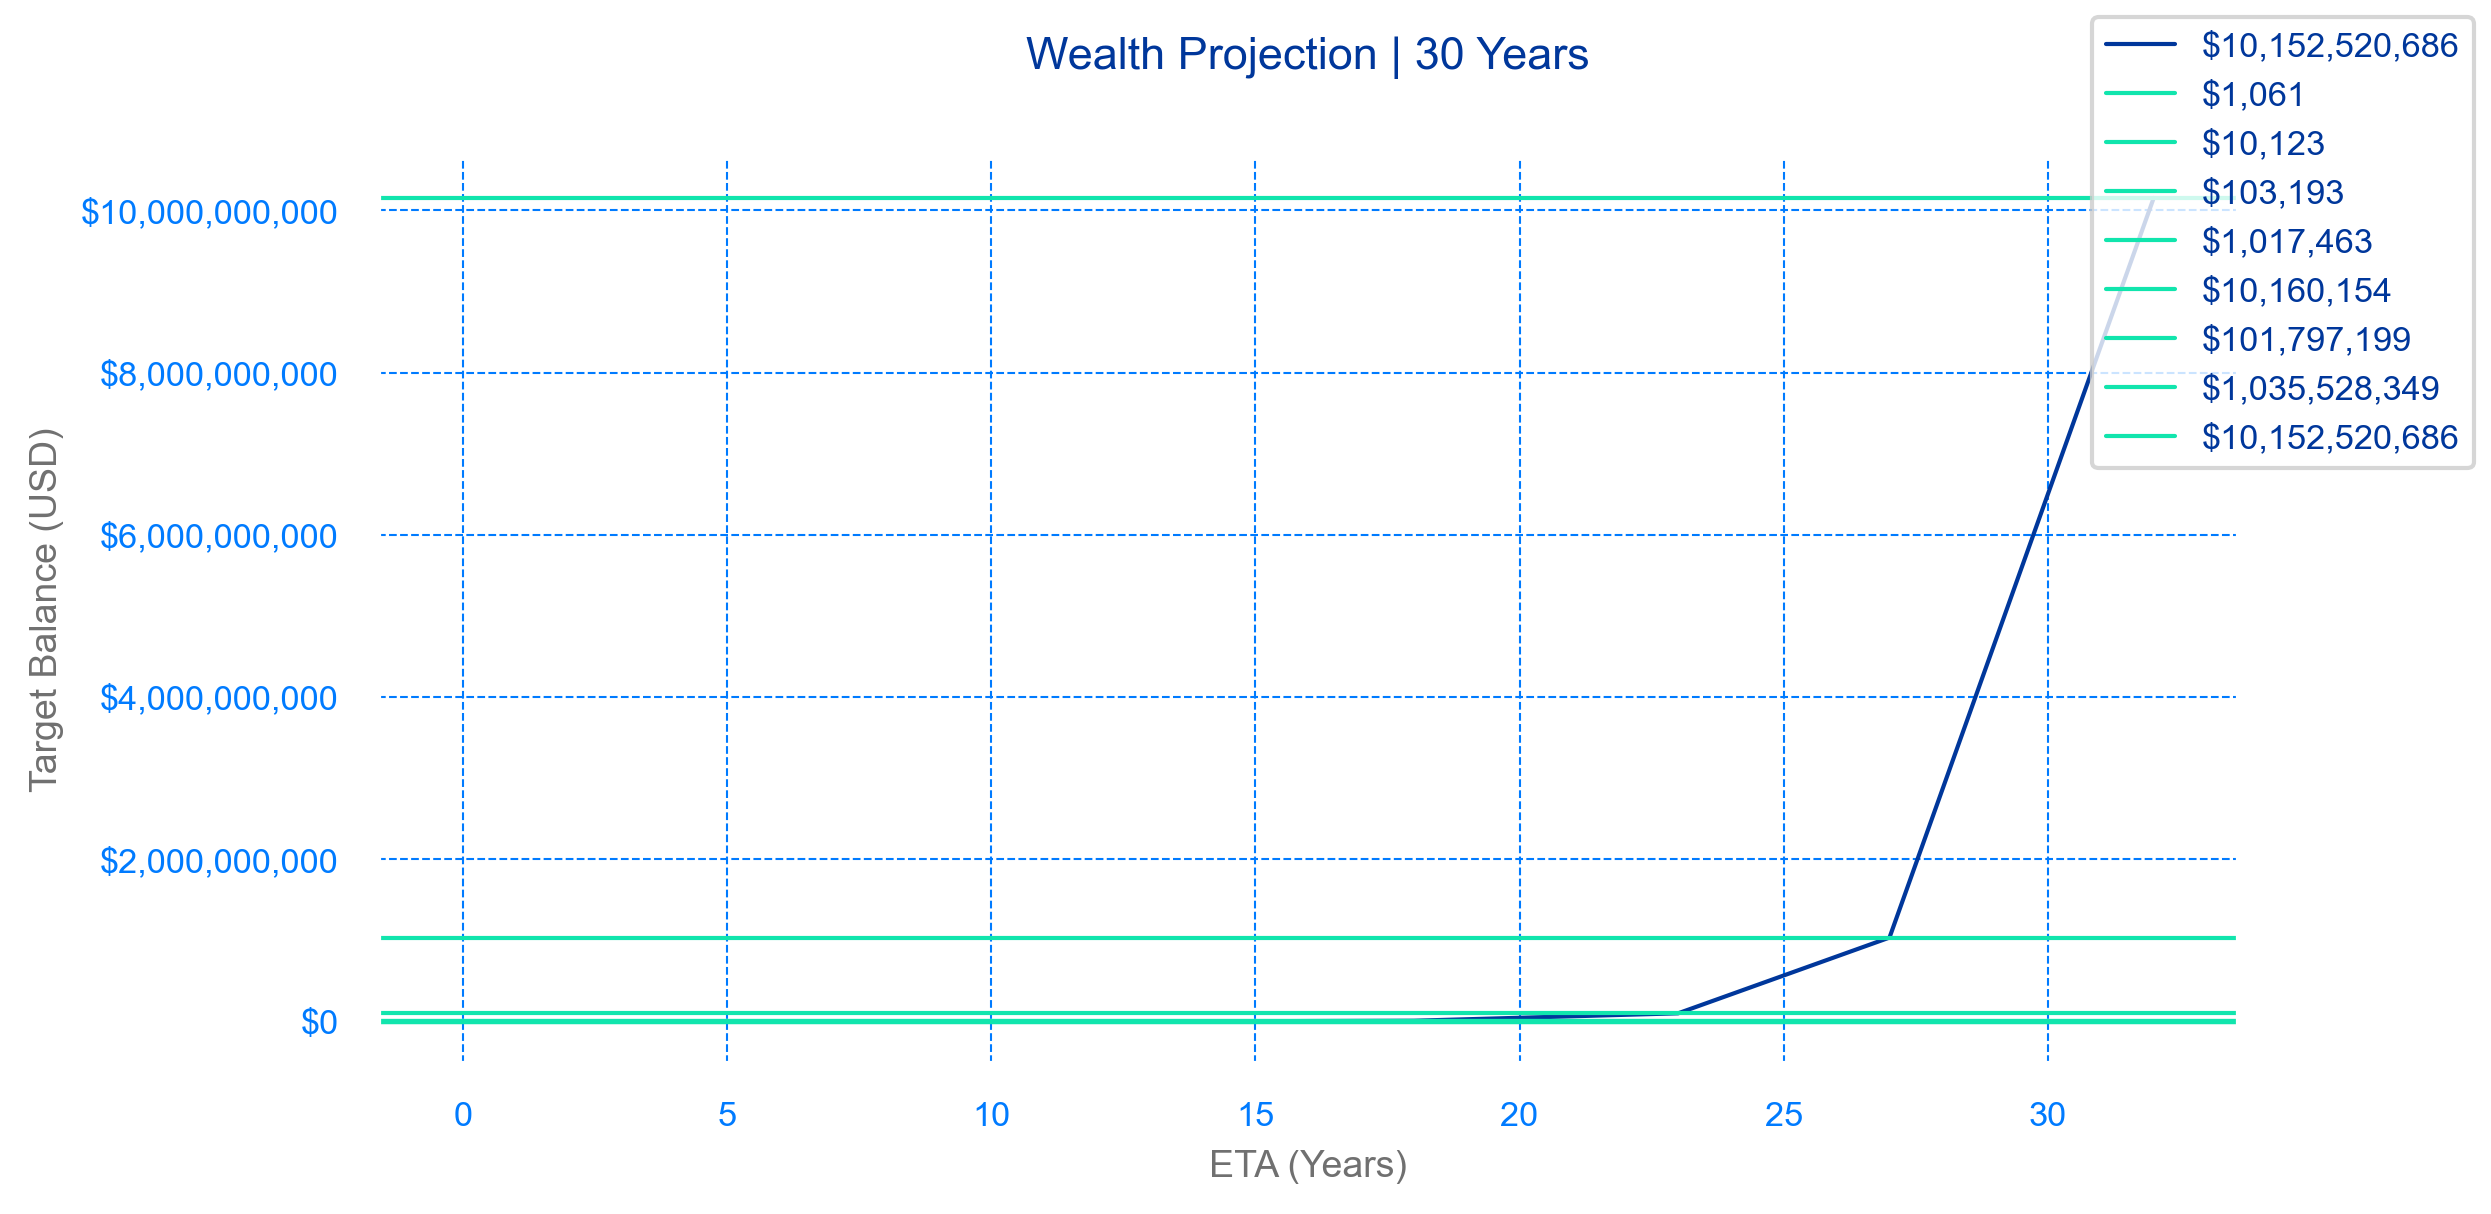

In [5]:
instance.send_reports()